In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale



In [87]:
dataframe = pd.read_excel("Engelsberger_full.xlsx")
dataframe.head()

,Accession (AGI code),Sequence with modifications,treatment,0,3,5,10,30,rsd0,rsd3,rsd5,rsd10,rsd30,motif,MAP Kinase substrate,pS,pT,pY,description
0,AT1G09180.1,YYLGL(pT)NFTTGK,NO3,0.079901,0.746354,0.332938,1.000000,0.058065,0.016234,0.329012,0.267104,0.514155,0.031623,NaN,NaN,NaN,(pT),NaN,ATSARA1A (ARABIDOPSIS THALIANA SECRETION-ASSOC...
1,AT5G45380.1,VVEAYA(pS)GDEDVDVPAEELREEK,NO3,0.990037,0.602870,0.028353,0.867053,1.000000,0.201147,0.265760,0.022747,0.445800,0.544612,......S.DE...,NaN,(pS),NaN,NaN,sodium:solute symporter family protein ...
2,AT3G08710.1,VTSIIDSVPE(pS)PQRP,NO3,0.926784,0.908153,0.668234,0.757583,1.000000,0.188296,0.400337,0.536099,0.389515,0.544612,NaN,NaN,(pS),NaN,NaN,ATH9 (thioredoxin H-type 9) ...
3,AT5G24840.1,VTE(pY)VKER,NO3,1.000000,0.498232,0.996924,0.001857,0.559389,0.203171,0.219634,0.799794,0.000955,0.304650,NaN,NaN,NaN,NaN,(pY),tRNA (guanine-N7-)-methyltransferase ...
4,AT4G35600.1,VG(pS)GMIVAIK,NO3,1.000000,0.914848,0.639969,0.343794,0.657122,0.203171,0.403289,0.513423,0.176763,0.357876,...R..S......,"MPK5, MPK8, MPK16",(pS),NaN,NaN,CONNEXIN 32; ATP binding / kinase/ protein kin...


In [88]:
dataframe["n"] = 1

In [89]:
dataframe = dataframe.drop(columns=["motif", "MAP Kinase substrate", "pS", "pT", "pY", "description", "Accession (AGI code)", "Sequence with modifications" ])

In [90]:
dataframe.head()
dataframe.tail()

,treatment,0,3,5,10,30,rsd0,rsd3,rsd5,rsd10,rsd30,n
2127,KCl,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2128,KCl,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2129,KCl,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2130,KCl,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2131,KCl,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [91]:
dataframe = dataframe.fillna(0).reset_index()

In [92]:
dataframe.tail()

,index,treatment,0,3,5,10,30,rsd0,rsd3,rsd5,rsd10,rsd30,n
2127,2127,KCl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2128,2128,KCl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2129,2129,KCl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2130,2130,KCl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2131,2131,KCl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [93]:
cols = dataframe.columns[1:]

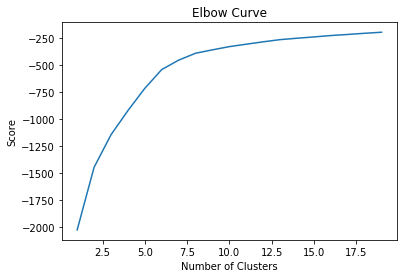

In [94]:
Nc = range(1, 20)
kmeans_elbow = [KMeans(n_clusters=i) for i in Nc]
kmeans_elbow
score = [kmeans_elbow[i].fit(dataframe[dataframe.columns[2:]]).score(dataframe[dataframe.columns[2:]]) for i in range(len(kmeans_elbow))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [95]:
dataframe['treatment'].replace('NO3', 0, inplace=True)
dataframe['treatment'].replace('NH4', 1, inplace=True)
dataframe['treatment'].replace('KCl', 2, inplace=True)

In [96]:
pca = PCA(n_components = 2)
dataframe['x'] = pca.fit_transform(dataframe[cols])[:,0]
dataframe['y'] = pca.fit_transform(dataframe[cols])[:,1]

In [97]:
pca.fit_transform(dataframe[cols])

array([[-1.05495798,  0.8252179 ],
       [-1.08821172,  0.10226871],
       [-1.0844891 ,  0.48604418],
       ...,
       [ 1.00879538, -0.61514511],
       [ 1.03756522,  0.51506416],
       [ 1.03756522,  0.51506416]])

In [106]:
cluster = KMeans(n_clusters = 10)
model = GaussianMixture(n_components=10, covariance_type='full').fit(dataframe[dataframe.columns[2:]])

In [107]:
dataframe["GMM"] = model.predict(dataframe[dataframe.columns[2:]])
dataframe["clusters"] = cluster.fit_predict(dataframe[dataframe.columns[2:]])

In [108]:
dataframe.head()

,index,treatment,0,3,5,10,30,rsd0,rsd3,rsd5,rsd10,rsd30,n,x,y,GMM,clusters
0,0,0,0.079901,0.746354,0.332938,1.000000,0.058065,0.016234,0.329012,0.267104,0.514155,0.031623,1,-1.054958,0.825218,8,9
1,1,0,0.990037,0.602870,0.028353,0.867053,1.000000,0.201147,0.265760,0.022747,0.445800,0.544612,1,-1.088212,0.102269,0,4
2,2,0,0.926784,0.908153,0.668234,0.757583,1.000000,0.188296,0.400337,0.536099,0.389515,0.544612,1,-1.084489,0.486044,8,9
3,3,0,1.000000,0.498232,0.996924,0.001857,0.559389,0.203171,0.219634,0.799794,0.000955,0.304650,1,-0.987903,0.068846,0,4
4,4,0,1.000000,0.914848,0.639969,0.343794,0.657122,0.203171,0.403289,0.513423,0.176763,0.357876,1,-1.053604,0.170014,8,9


In [109]:
dataframe.tail()

,index,treatment,0,3,5,10,30,rsd0,rsd3,rsd5,rsd10,rsd30,n,x,y,GMM,clusters
2127,2127,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.008795,-0.615145,4,0
2128,2128,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.008795,-0.615145,4,0
2129,2129,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.008795,-0.615145,4,0
2130,2130,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.037565,0.515064,3,3
2131,2131,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.037565,0.515064,3,3


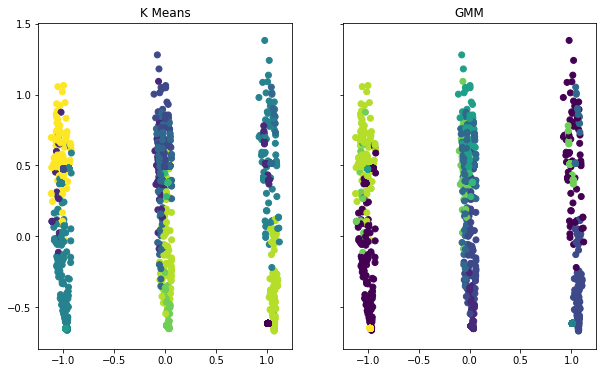

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize =(10,6))
ax1.set_title("K Means")
ax1.scatter(dataframe["x"], dataframe["y"], c= dataframe["clusters"])
ax2.set_title("GMM")
ax2.scatter(dataframe["x"], dataframe["y"], c= dataframe["GMM"])